In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from imblearn.over_sampling import RandomOverSampler

In [3]:
df = pd.read_csv('diabetes.csv')

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


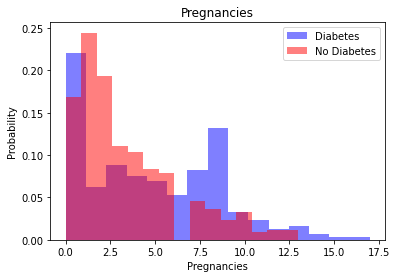

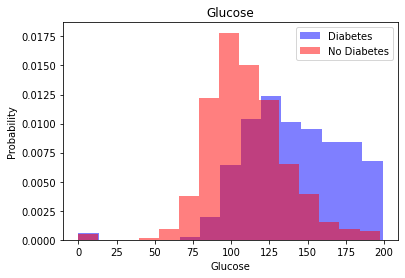

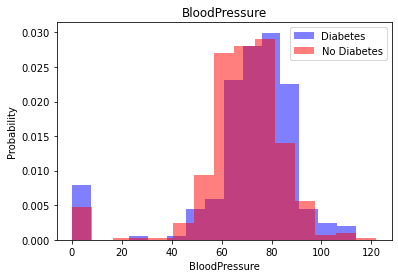

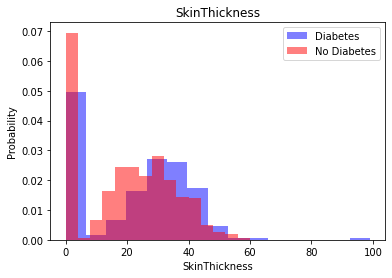

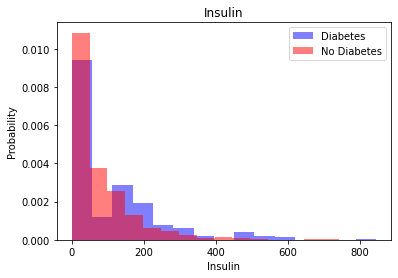

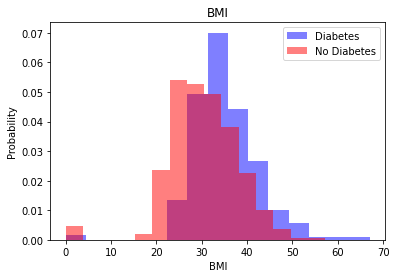

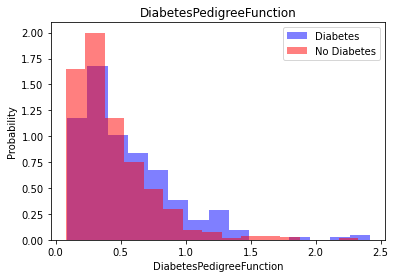

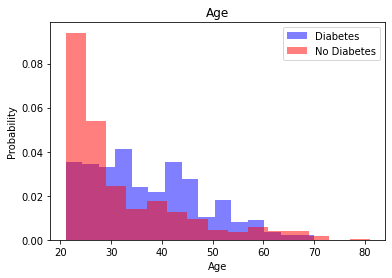

In [5]:
for i in range(len(df.columns[:-1])):
    label = df.columns[i]
    plt.hist(df[df['Outcome']==1][label], color='blue', label='Diabetes', alpha=0.5, density=True, bins=15)
    plt.hist(df[df['Outcome']==0][label], color='red', label='No Diabetes', alpha=0.5, density=True, bins=15)
    plt.title(label)
    plt.ylabel("Probability")
    plt.xlabel(label)
    plt.legend()
    plt.show()

In [6]:
X = df[df.columns[:-1]].values
y = df[df.columns[-1]].values

In [7]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
data = np.hstack((X, np.reshape(y, (-1, 1))))
transformed_df = pd.DataFrame(data, columns=df.columns)

In [15]:
over = RandomOverSampler()
X, y = over.fit_resample(X, y)
data = np.hstack((X, np.reshape(y, (-1, 1))))
transformed_df = pd.DataFrame(data, columns=df.columns)

In [16]:
len(transformed_df[transformed_df['Outcome']==1]), len(transformed_df[transformed_df['Outcome']==0])

(500, 500)

In [17]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=0)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=0)

In [18]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(16, activation='relu'), # if x <= 0 --> 0, x > 0 --> x
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [19]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [20]:
model.evaluate(X_train, y_train)

19/19 [==============================] - 0s 2ms/step - loss: 0.7697 - accuracy: 0.3567


[0.7697396278381348, 0.3566666543483734]

In [21]:
model.evaluate(X_valid, y_valid)

7/7 [==============================] - 0s 6ms/step - loss: 0.7597 - accuracy: 0.3350


[0.7596612572669983, 0.33500000834465027]

In [22]:
model.fit(X_train, y_train, batch_size=16, epochs=20, validation_data=(X_valid, y_valid))

Epoch 1/20
38/38 [==============================] - 2s 11ms/step - loss: 0.7313 - accuracy: 0.4100 - val_loss: 0.6968 - val_accuracy: 0.4600
Epoch 2/20
38/38 [==============================] - 0s 8ms/step - loss: 0.6718 - accuracy: 0.6000 - val_loss: 0.6535 - val_accuracy: 0.6400
Epoch 3/20
38/38 [==============================] - 0s 8ms/step - loss: 0.6293 - accuracy: 0.7067 - val_loss: 0.6143 - val_accuracy: 0.7200
Epoch 4/20
38/38 [==============================] - 0s 8ms/step - loss: 0.5897 - accuracy: 0.7200 - val_loss: 0.5773 - val_accuracy: 0.7000
Epoch 5/20
38/38 [==============================] - 0s 9ms/step - loss: 0.5553 - accuracy: 0.7333 - val_loss: 0.5457 - val_accuracy: 0.7400
Epoch 6/20
38/38 [==============================] - 0s 12ms/step - loss: 0.5309 - accuracy: 0.7483 - val_loss: 0.5236 - val_accuracy: 0.7650
Epoch 7/20
38/38 [==============================] - 0s 8ms/step - loss: 0.5145 - accuracy: 0.7417 - val_loss: 0.5055 - val_accuracy: 0.7650
Epoch 8/20
38/38 [

In [23]:
model.evaluate(X_test, y_test)

7/7 [==============================] - 0s 5ms/step - loss: 0.4889 - accuracy: 0.7600


[0.4888942837715149, 0.7599999904632568]